# Machine Learning II: Deep Learning and Applications
# Homework 1

**Due date: Feb 16**

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.
- Submit the link of your notebook [here](https://docs.google.com/forms/d/e/1FAIpQLSd3LoRVwJ1Nc8hogOv76Y6_JbfPTdRzxUNfaU1ZV9GVaIZDSA/viewform?usp=sf_link). Please **enable editing or comments** so that you can receive feedback from TAs.

Install PyTorch and Skorch.

In [0]:
!pip install -q torch skorch torchvision torchtext

     |████████████████████████████████| 112kB 2.9MB/s 


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import skorch
import sklearn
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Tensor Operations (20 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.

### 1) Tensor squeezing, unsqueezing and viewing

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [0]:
#x[row,column]
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x = x.unsqueeze(1).unsqueeze(-1)

print('\nUnsqueeze:', x.shape)

# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = x.squeeze(-1).squeeze(1)

print('\nSqueeze:', x.shape)

# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x = torch.Tensor.view(x,6)

print('\nTensor.view:', x.shape)


Unsqueeze: torch.Size([3, 1, 2, 1])

Squeeze: torch.Size([3, 2])

Tensor.view: torch.Size([6])


### 2) Tensor concatenation and stack

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

In [0]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.
# Use torch.stack to generate such a z
z = torch.stack((x, y), 0)

print("Stack:", z.shape)
print(z[0,:,:])
print(z[1,:,:])

# Use torch.cat and torch.unsqueeze to generate such a z
z = torch.cat((x.unsqueeze(0), y.unsqueeze(0)), 0)

print("\nCat:", z.shape)
print(z[0,:,:])
print(z[1,:,:])

Stack: torch.Size([2, 3, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[-1., -2.],
        [-3., -4.],
        [-5., -6.]])

Cat: torch.Size([2, 3, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[-1., -2.],
        [-3., -4.],
        [-5., -6.]])


### 3) Tensor expansion

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice. 

In [0]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.
# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = x.unsqueeze(0)

print('\nUnsqueeze:', x.shape)

# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
z = x.expand(2, 3)

print('\nExpand:', z.shape)
print(z)


Unsqueeze: torch.Size([1, 3])

Expand: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [1., 2., 3.]])


### 4) Tensor reduction in a given dimension

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [0]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)

# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
x_mean = torch.mean(x, 1)

print("Mean Size: ", x_mean.shape)
print("Mean Test: ", x_mean[0] == torch.mean(x[0, :]))

# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = torch.sum(x, 1)

print("\nSum Size: ", x_sum.shape)
print("Sum Test: ", x_sum[0] == torch.sum(x[0, :]))

# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
x_max = torch.max(x, 1).values

print("\nMax Size: ", x_max.shape)
print("Max Test: ", x_max[0] == torch.max(x[0, :]))

# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
x_min = torch.min(x, 1).values

print("\nMin Size: ", x_min.shape)
print("Min Test: ", x_min[0] == torch.min(x[0, :]))

# Compute the top-5 values for each row of x.
# You need to generate a tensor x_top of size (10, 5), and x_top[k, :] is the top-5 values of each row in x.
x_top = torch.topk(x, 5, 1).values

print("\nTop 5 Size: ", x_top.shape)
print("Top 5 Test:", x_top[0] == torch.topk(x[0, :], 5).values)

Mean Size:  torch.Size([10])
Mean Test:  tensor(True)

Sum Size:  torch.Size([10])
Sum Test:  tensor(True)

Max Size:  torch.Size([10])
Max Test:  tensor(True)

Min Size:  torch.Size([10])
Min Test:  tensor(True)

Top 5 Size:  torch.Size([10, 5])
Top 5 Test: tensor([True, True, True, True, True])


## Convolutional Neural Networks (40 points)



Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`. For this question, we use the default validation split generated by Skorch.

In [0]:
train = torchvision.datasets.CIFAR10("./data", train=True, download=True)
test = torchvision.datasets.CIFAR10("./data", train=False, download=True)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.

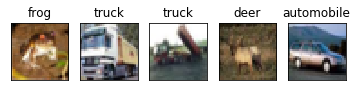

In [0]:
def plot(data, labels=None, num_sample=5):
  n = min(len(data), num_sample)
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    if labels is not None:
      plt.title(labels[i])

train.labels = [train.classes[target] for target in train.targets]
plot(train.data, train.labels)

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.

#### a) Implement convolutional layers

Implement the initialization function and the forward function of the CNN.

In [0]:
class CNN(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(CNN, self).__init__()
    # implement parameter definitions here
    self.conv1 = nn.Conv2d(in_channels=in_channel, out_channels=out_channel, kernel_size = 3, padding = 1)
    self.conv2 = nn.Conv2d(in_channels=out_channel, out_channels=out_channel, kernel_size = 3, padding = 1)
    self.conv3 = nn.Conv2d(in_channels=out_channel, out_channels=out_channel, kernel_size = 3, padding = 1)
    self.fc1 = nn.Linear(out_channel*32*32, 10)

  def forward(self, images):
    # implement the forward function here
    images = F.relu(self.conv1(images))
    images = F.relu(self.conv2(images))
    images = F.relu(self.conv3(images))
    images = images.view(images.size(0), -1) 
    images = self.fc1(images)
    return images

#### b) Tune hyperparameters

Train the CNN model on CIFAR-10 dataset. Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.

In [0]:
#Hyperparameters (could use GridSearch CV as well)
channels = [128, 256, 512]
optimizer = [optim.Adam, optim.SGD]
learning_rate = [1e-3, 1e-4, 1e-5]

#Type Cast
x = train.data.transpose(0,3,2,1)
x = torch.cuda.FloatTensor(x).div(255.0)

for o in optimizer:
  for c in channels:
    for l in learning_rate:
      print("Train for : {0} channels, {1} learning rate, {2} optimizer".format(c, l, str(o)))
      if o == optim.SGD:
        epoch = 20
      else:
        epoch = 10
      # implement hyperparameters here
      model = skorch.NeuralNetClassifier(CNN,
                                         module__in_channel=3, 
                                         module__out_channel=c, 
                                         criterion=torch.nn.CrossEntropyLoss, 
                                         optimizer=o, 
                                         max_epochs=epoch, 
                                         lr=l, 
                                         device="cuda")
      
      # implement input normalization & type cast here
      model.fit(x, np.array(train.targets))

Train for : 128 channels, 0.001 learning rate, <class 'torch.optim.adam.Adam'> optimizer
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.5512       0.5529        1.2814  16.3134
      2        1.1484       0.6132        1.1046  16.2880
      3        0.9577       0.6327        1.0784  16.2809
      4        0.8177       0.6398        1.0824  16.2911
      5        0.6935       0.6183        1.2322  16.3067
      6        0.5836       0.6060        1.3876  16.2250
      7        0.4885       0.5896        1.5362  16.2011
      8        0.4047       0.6166        1.5434  16.1873
      9        0.3275       0.6059        1.8700  16.1952
     10        0.2659       0.6011        2.0121  16.2681
Train for : 128 channels, 0.0001 learning rate, <class 'torch.optim.adam.Adam'> optimizer
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1  

Write down **validation accuracy** of your model under different hyperparameter settings. Note the validation set is automatically split by Skorch during `model.fit()`.

**Hint:** You may need more epochs for SGD than Adam.

| #channel for each layer \ optimizer | SGD   | Adam  |
|-------------------------------------|-------|-------|
| (128, 128, 128)                     |43.88 |65.26 |
| (256, 256, 256)                     |46.66 |65.86 |
| (512, 512, 512)                     |48.96 |65.81  |

*A learning rate of 0.0001 is used for the Adam results and a learning rate of 0.001 is used for the SGD results.*

### 2) Full CNN implementation

Based on the CNN in the previous question, implement a full CNN model with max pooling layer.

- Add a max pooling layer after each convolutional layer.
- Each max pooling layer has a kernel size of 2 and a stride of 2.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table. You are also required to complete the questions.

#### a) Implement max pooling layers

Copy the CNN implementation in previous question. Implement max pooling layers.

In [0]:
class CNN_MaxPool(nn.Module):
  def __init__(self, in_channel, out_channel_1, out_channel_2, out_channel_3):
    super(CNN_MaxPool, self).__init__()
    # implement parameter definitions here
    self.conv1 = nn.Conv2d(in_channel, out_channel_1, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(out_channel_1, out_channel_2, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(out_channel_2, out_channel_3, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(stride = 2, kernel_size = 2)
    self.fc1 = nn.Linear(out_channel_3 * 4 * 4, 10)
  
  def forward(self, images):
    # implement the forward function here
    images = self.pool(F.relu(self.conv1(images)))
    images = self.pool(F.relu(self.conv2(images)))
    images = self.pool(F.relu(self.conv3(images)))
    images = images.view(images.size(0), -1) 
    images = self.fc1(images)
    return images

#### b) Tune hyperparameters

Based on best optimizer you found in the previous problem, tune the number of channels and learning rate for best validation accuracy.

In [0]:
#Hyperparameters 
channels = [128, 256, 512]
learning_rate = [1e-3, 1e-4]

#Type Cast
x = train.data.transpose(0,3,2,1)
x = torch.cuda.FloatTensor(x).div(255.0)

for c in channels:
  for l in learning_rate:
    print("Train for : {0} channels, {1} learning rate, {2} optimizer".format(c, l, str('Adam')))
    # implement hyperparameters here
    model = skorch.NeuralNetClassifier(CNN_MaxPool,
                                        module__in_channel=3, 
                                        module__out_channel_1=c, 
                                        module__out_channel_2=c,
                                        module__out_channel_3=c,
                                        criterion=torch.nn.CrossEntropyLoss, 
                                        optimizer=optim.Adam, 
                                        max_epochs=10, 
                                        lr=l, 
                                        device="cuda")
    
    # implement input normalization & type cast here
    model.fit(x, np.array(train.targets))

Train for : 128 channels, 0.001 learning rate, Adam optimizer
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.6733       0.5123        1.3652  4.5088
      2        1.2524       0.5965        1.1438  4.4947
      3        1.0764       0.6341        1.0519  4.5152
      4        0.9649       0.6605        0.9758  4.5042
      5        0.8807       0.6751        0.9310  4.5105
      6        0.8119       0.6918        0.8843  4.5170
      7        0.7550       0.7061        0.8540  4.4914
      8        0.7098       0.7028        0.8572  4.4964
      9        0.6736       0.7109        0.8397  4.5072
     10        0.6333       0.7138        0.8464  4.5043
Train for : 128 channels, 0.0001 learning rate, Adam optimizer
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.9124       0.4167        1.6423  4.5095
      2        1.576

In [0]:
#Hyperparameters 
channels = [128, 256, 512]
learning_rate = [1e-3, 1e-4]

#Type Cast
x = train.data.transpose(0,3,2,1)
x = torch.cuda.FloatTensor(x).div(255.0)

for c in channels:
  for l in learning_rate:
    print("Train for : {0} channels, {1} learning rate, {2} optimizer".format(c, l, str('Adam')))
    # implement hyperparameters here
    model = skorch.NeuralNetClassifier(CNN_MaxPool,
                                        module__in_channel=3, 
                                        module__out_channel_1=c, 
                                        module__out_channel_2=c*2,
                                        module__out_channel_3=c*2*2,
                                        criterion=torch.nn.CrossEntropyLoss, 
                                        optimizer=optim.Adam, 
                                        max_epochs=10, 
                                        lr=l, 
                                        device="cuda")
    
    # implement input normalization & type cast here
    model.fit(x, np.array(train.targets))

Train for : 128 channels, 0.001 learning rate, Adam optimizer
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.6384       0.5310        1.3167  6.8921
      2        1.2038       0.6110        1.0908  6.8853
      3        1.0042       0.6564        0.9746  6.9013
      4        0.8697       0.6876        0.8844  6.9232
      5        0.7642       0.7047        0.8458  6.8942
      6        0.6823       0.7120        0.8474  6.8927
      7        0.6109       0.7102        0.8682  6.9117
      8        0.5502       0.7126        0.8964  6.9009
      9        0.4978       0.7100        0.9332  6.9163
     10        0.4534       0.7123        0.9693  6.8805
Train for : 128 channels, 0.0001 learning rate, Adam optimizer
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7900       0.4693        1.4775  6.9052
      2        1.395

Write down the **validation accuracy** of your model under different hyperparameter settings.

| #channel for each layer | validation accuracy |
|-------------------------|---------------------|
| (128, 128, 128)         |     61.00              |
| (128, 256, 512)         |     69.59     |
| (256, 256, 256)         |     68.12      |
| (256, 512, 1024)        |     73.24     |
| (512, 512, 512)         |     71.98          |
| (512, 1024, 2048)       |     73.88           |


For the best model you have, test it on the test set.

It is fine if you found some hyperparameter combination better than those listed in the tables.

In [0]:
#Type Cast
x = train.data.transpose(0,3,2,1)
x = torch.cuda.FloatTensor(x).div(255.0)

model = skorch.NeuralNetClassifier(CNN_MaxPool,
                                   module__in_channel=3, 
                                   module__out_channel_1=512, 
                                   module__out_channel_2=1024,
                                   module__out_channel_3=2048,
                                   criterion=torch.nn.CrossEntropyLoss, 
                                   optimizer=optim.Adam, 
                                   max_epochs=10, 
                                   lr=1e-4, 
                                   device="cuda")
    
# implement input normalization & type cast here
model.fit(x, np.array(train.targets))

  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.6438       0.5234        1.3386  57.9355
      2        1.2347       0.6137        1.1143  59.9029
      3        1.0313       0.6559        0.9819  61.6959
      4        0.8932       0.6817        0.9087  62.6230
      5        0.7912       0.7035        0.8456  63.3900
      6        0.7057       0.7199        0.8069  63.9279
      7        0.6281       0.7296        0.7825  64.2834
      8        0.5586       0.7356        0.7703  64.5500
      9        0.4935       0.7340        0.7862  64.6399
     10        0.4353       0.7278        0.8184  64.6878


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN_MaxPool(
    (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=32768, out_features=10, bias=True)
  ),
)

In [0]:
y = test.data.transpose(0,3,2,1)
y = torch.cuda.FloatTensor(y).div(255.0)

# implement the same input normalization & type cast here
test.predictions = model.predict(y)
sklearn.metrics.accuracy_score(test.targets, test.predictions)

0.7225

How much **test accuracy** do you get?

**Your Answer:**

I get a test accuracy of 72.25 using the CNN with max pooling, layers of 512, 1024, and 2048, as well as an Adam optimizer with a learning rate of 0.0001 trained for 10 epochs. 

What can you conclude for the design of CNN structure?

**Your Answer:**

Based on the results, we can conclude that having pooling layers as part of the CNN structure improves the validation accuracy. Furthermore, we can see that 512, 1024, and 2048 are reasonable values for the layers based on the results. This makes sense as hidden layers correspond to feature maps. The design of the CNN could be further optimized using regularization techniques and by adding convolution layers. Deeper networks typically allow low to high levels to be modelled in an image, and can improve accuracy.

## Recurrent Neural Networks (40 points)

Next, let's use PyTorch to implement a recurrent neural network for sentiment analysis, i.e., classifying sentences into given sentiment labels, including positive, negative and neutral.

We use a benckmark dataset (i.e., SST) for this task. First, let's download the SST dataset, and do some preprocessing to build vocabulary and split the dataset into training/validation/test sets. Also, let's define the training and evaluation function. Please do not modify the functions.

In [0]:
import copy
import torch
from torch import nn
from torch import optim
import torchtext
from torchtext import data
from torchtext import datasets

TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.LabelField()

# load data splits
train_data, val_data, test_data = datasets.SST.splits(TEXT, LABEL)

# build dictionary
TEXT.build_vocab(train_data)
LABEL.build_vocab(train_data)

vocab_size = len(TEXT.vocab)
label_size = len(LABEL.vocab)
padding_idx = TEXT.vocab.stoi['<pad>']
embedding_dim = 128
hidden_dim = 128

# build iterators
train_iter, val_iter, test_iter = data.BucketIterator.splits(
    (train_data, val_data, test_data), 
    batch_size=32)

# train a model
# DO NOT MODIFY
def train(model, iterator, optimizer, criterion):
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()
        logits = model(batch.text.cuda())
        predictions = torch.max(logits, dim=-1)[1]
        loss = criterion(logits, batch.label.cuda())
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
        total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

# evaluate a model
# DO NOT MODIFY
def evaluate(model, iterator, criterion):  
    total_loss, total_correct, total_prediction = 0.0, 0.0, 0.0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            logits = model(batch.text.cuda())
            predictions = torch.max(logits, dim=-1)[1]
            loss = criterion(logits, batch.label.cuda())

            total_loss += loss.item()
            total_correct += torch.eq(predictions, batch.label.cuda()).sum().item()
            total_prediction += batch.label.size(0)
    return total_loss / len(iterator), total_correct / total_prediction

downloading trainDevTestTrees_PTB.zip


trainDevTestTrees_PTB.zip: 100%|██████████| 790k/790k [00:00<00:00, 956kB/s]


extracting


Next, we are ready to build our RNN model for sentiment analysis. In the following codes, we have provided several hyperparameters we needed for building the model, including vocabulary size (vocab_size), the word embedding dimension (embedding_dim), the hidden layer dimension (hidden_dim), the number of layers (num_layers) and the number of sentence labels (label_size). Please fill in the missing codes, and implement a RNN model.

In [0]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, label_size, padding_idx):
        super(RNNClassifier, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.label_size = label_size
        self.num_layers = 1

        # add the layers required for sentiment analysis.
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim, padding_idx=padding_idx)
        self.rnn = nn.RNN(self.embedding_dim, self.hidden_dim, batch_first=True)
        self.h2l = nn.Linear(self.hidden_dim, self.label_size)

    def zero_state(self, batch_size): 
        # implement the function, which returns an initial hidden state.
        return torch.zeros(self.num_layers, batch_size, self.hidden_dim).cuda()

    def forward(self, text):
        # implement the forward function of the model.
        x = self.embedding(text)
        output, _ = self.rnn(x, self.zero_state(len(text)))
        output = self.h2l(output[:, -1, :])
        return output

Finally, we are ready to train the model and compute the accuracy.

**Subtask 2**

In [0]:
model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
# tune the optimizer type and hyperparameters here
criterion = nn.CrossEntropyLoss()
criterion.cuda()
model.cuda()

optimizers = [optim.Adam, optim.SGD, optim.RMSprop]
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]

for o in optimizers:
  for l in learning_rates:
    print('\nTrain for: optimizer {0}, learning rate {1}'.format(str(o), l, ))
    optimizer = o(model.parameters(), lr=l)

    # train and test the model
    # DO NOT MODIFY
    best_valid_acc = 0.0
    best_state_dict = copy.deepcopy(model.state_dict())
    for epoch in range(20):
        train_loss, train_acc = train(model, train_iter, optimizer, criterion)
        valid_loss, valid_acc = evaluate(model, val_iter, criterion)

        print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

        if valid_acc > best_valid_acc:
            best_valid_acc = valid_acc
            best_state_dict = copy.deepcopy(model.state_dict())
    print(best_valid_acc)


Train for: optimizer <class 'torch.optim.adam.Adam'>, learning rate 0.1
Epoch 0 | Train loss 1.624 | Valid loss 1.516 | Valid acc 0.388
Epoch 1 | Train loss 1.678 | Valid loss 1.577 | Valid acc 0.281
Epoch 2 | Train loss 1.541 | Valid loss 1.599 | Valid acc 0.317
Epoch 3 | Train loss 1.630 | Valid loss 2.761 | Valid acc 0.333
Epoch 4 | Train loss 1.637 | Valid loss 3.095 | Valid acc 0.238
Epoch 5 | Train loss 1.835 | Valid loss 1.906 | Valid acc 0.404
Epoch 6 | Train loss 1.778 | Valid loss 1.413 | Valid acc 0.480
Epoch 7 | Train loss 1.900 | Valid loss 2.060 | Valid acc 0.221
Epoch 8 | Train loss 1.803 | Valid loss 1.923 | Valid acc 0.376
Epoch 9 | Train loss 1.992 | Valid loss 1.346 | Valid acc 0.415
Epoch 10 | Train loss 2.035 | Valid loss 3.274 | Valid acc 0.223
Epoch 11 | Train loss 1.994 | Valid loss 3.100 | Valid acc 0.379
Epoch 12 | Train loss 1.747 | Valid loss 1.325 | Valid acc 0.294
Epoch 13 | Train loss 1.855 | Valid loss 1.804 | Valid acc 0.239
Epoch 14 | Train loss 1.879

**Subtask 3**

In [0]:
model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
# tune the optimizer type and hyperparameters here
criterion = nn.CrossEntropyLoss()
criterion.cuda()
model.cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-1)
epochs = [10, 20, 30, 40, 50]

for i in epochs:
  print('Train for {} of epochs'.format(i))
  
  # train and test the model
  # DO NOT MODIFY
  best_train_acc = 0.0
  best_valid_acc = 0.0
  best_state_dict = copy.deepcopy(model.state_dict())
  for epoch in range(i):
      train_loss, train_acc = train(model, train_iter, optimizer, criterion)
      valid_loss, valid_acc = evaluate(model, val_iter, criterion)

      print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

      if train_acc > best_train_acc:
        best_train_acc = train_acc

      if valid_acc > best_valid_acc:
          best_valid_acc = valid_acc
          best_state_dict = copy.deepcopy(model.state_dict())
  print(best_valid_acc, best_train_acc)

Train for 10 of epochs
Epoch 0 | Train loss 1.721 | Valid loss 2.161 | Valid acc 0.267
Epoch 1 | Train loss 1.500 | Valid loss 1.475 | Valid acc 0.324
Epoch 2 | Train loss 1.390 | Valid loss 1.614 | Valid acc 0.512
Epoch 3 | Train loss 1.654 | Valid loss 1.467 | Valid acc 0.409
Epoch 4 | Train loss 1.588 | Valid loss 1.369 | Valid acc 0.410
Epoch 5 | Train loss 1.504 | Valid loss 1.593 | Valid acc 0.408
Epoch 6 | Train loss 1.409 | Valid loss 1.864 | Valid acc 0.400
Epoch 7 | Train loss 1.579 | Valid loss 1.108 | Valid acc 0.440
Epoch 8 | Train loss 1.618 | Valid loss 1.171 | Valid acc 0.559
Epoch 9 | Train loss 1.443 | Valid loss 1.757 | Valid acc 0.360
0.5594913714804723 0.3851825842696629
Train for 20 of epochs
Epoch 0 | Train loss 1.542 | Valid loss 1.405 | Valid acc 0.232
Epoch 1 | Train loss 1.472 | Valid loss 1.161 | Valid acc 0.558
Epoch 2 | Train loss 1.460 | Valid loss 1.168 | Valid acc 0.407
Epoch 3 | Train loss 1.536 | Valid loss 1.751 | Valid acc 0.424
Epoch 4 | Train loss

**Subtask 4**

In [0]:
# tune the optimizer type and hyperparameters here
dims = [64, 128, 256]

for i in dims:
  for j in dims:
    embedding_dim, hidden_dim=i,j
    print('\nTrain for embedding dimension {0} and hidden dimension {1}'.format(i, j))
    model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx)
    model.cuda()
    criterion = nn.CrossEntropyLoss()
    criterion.cuda()
    optimizer = optim.Adam(model.parameters(), lr=1e-1)


    # train and test the model
    # DO NOT MODIFY
    best_valid_acc = 0.0
    best_state_dict = copy.deepcopy(model.state_dict())
    for epoch in range(20):
        train_loss, train_acc = train(model, train_iter, optimizer, criterion)
        valid_loss, valid_acc = evaluate(model, val_iter, criterion)

        print('Epoch {} | Train loss {:.3f} | Valid loss {:.3f} | Valid acc {:.3f}'.format(epoch, train_loss, valid_loss, valid_acc))

        if valid_acc > best_valid_acc:
            best_valid_acc = valid_acc
            best_state_dict = copy.deepcopy(model.state_dict())

    print(best_valid_acc)


Train for embedding dimension 64 and hidden dimension 64
Epoch 0 | Train loss 1.370 | Valid loss 1.297 | Valid acc 0.463
Epoch 1 | Train loss 1.275 | Valid loss 1.394 | Valid acc 0.427
Epoch 2 | Train loss 1.257 | Valid loss 1.478 | Valid acc 0.350
Epoch 3 | Train loss 1.268 | Valid loss 1.109 | Valid acc 0.459
Epoch 4 | Train loss 1.319 | Valid loss 1.250 | Valid acc 0.307
Epoch 5 | Train loss 1.360 | Valid loss 1.689 | Valid acc 0.401
Epoch 6 | Train loss 1.213 | Valid loss 1.283 | Valid acc 0.317
Epoch 7 | Train loss 1.254 | Valid loss 1.041 | Valid acc 0.543
Epoch 8 | Train loss 1.297 | Valid loss 1.076 | Valid acc 0.505
Epoch 9 | Train loss 1.331 | Valid loss 1.176 | Valid acc 0.492
Epoch 10 | Train loss 1.270 | Valid loss 1.156 | Valid acc 0.405
Epoch 11 | Train loss 1.258 | Valid loss 1.394 | Valid acc 0.403
Epoch 12 | Train loss 1.273 | Valid loss 1.485 | Valid acc 0.389
Epoch 13 | Train loss 1.259 | Valid loss 1.219 | Valid acc 0.334
Epoch 14 | Train loss 1.303 | Valid loss 1

Once we find the best hyperparameters for the validation set, we can now evaluate our model on the test set.

In [0]:
model.load_state_dict(best_state_dict)
test_loss, test_acc = evaluate(model, test_iter, criterion)
print('Test loss {:.3f} | Test acc {:.3f}'.format(test_loss, test_acc))

### 1) Implement the RNN model

The current codes of the RNN model are not complete, so let's first complete the codes to implement a standard RNN model by filling in the [block](https://colab.research.google.com/drive/1mhhF9FPHSmePtVQrhNBwRujfUkOjUspj#scrollTo=kWUKPgDGNQSr).

- **Subtask 1-1: Creating all the Required Layers in Your Model**

Remember that when building a deep learning model, we first need to complete the **init** function by creating all the required layers. In our case, since we are using RNNs for sentence classification, we need an embedding layer to transform words into word embeddings, a RNN layer to transform word embeddings into sentence encodings, an activation function, and a linear layer as well as a softmax function for sentence classification.

Based on that, please create all the necessary layers of your RNN model in the **init** function. Note that we have already added the word embedding layer for you.

- **Subtask 1-2: Implementing the Function for Initializing Hidden States**

Remember that when applying a RNN unit to transform word embeddings into sentence encodings, the RNN unit starts from an initial hidden vector with all zero values, and sequentially read each word to update the hidden vector. Finally, the hidden vector obtained after reading the last word is treated as the sentence encoding.

In this step, please implement the **zero_state** function, which returns a batch of initial hidden vectors given a batch size. Hint: your function should return a tensor with all the values being zero, and you may refer to the [official document](https://pytorch.org/docs/stable/nn.html#rnn) for the correct shape of the tensor.

- **Subtask 1-3: Implementing the Forward Function**

Finally, we are ready to build the forward function, which takes a batch of sentences as inputs and returns a batch of logits. To be more specific, the input is given by the tensor called $\text{text}$, and the size of the tensor is $(B, L)$, with $B$ being the batch size, $L$ being the maximum length of sentencees in this batch and $\text{text}[i, j]$ being the interger id of the $j$-th word in the $i$-th sentence. Given this tensor as input, your forward function should return a logit tensor of size $(B, C)$, with $B$ being the batch size and $C$ being the number of possible classes.

Please implement the forward function based on the above instructions. Note that we have already applied the word embedding layer to the text input, and obtained a tensor called $\text{embedding}$, and the size of the tensor is $(B, L, D)$, where $D$ is the word embedding dimension. You can directly operate on the $\text{embedding}$ tensor to compute the logits.

### 2) Compare Different Optimizers

In the previous task, we have implemented a RNN model for sentiment analysis, or more generally sentence classification.

To better understand several concepts in deep learning, let's do some ablation studies by using the model we have just implemented.

The first task is to try different optimizers for your model, where for each optimizer, you may also try different options of learning rate. 


- **Subtask 2-1: Completing the Table**

We have provided the following table for different combinations of optimizers and learning rate, please write down the **validation accuracy** of your model with different optimizers and learning rates.

|         | 0.1  | 0.01 | 0.001|0.0001|
|---------|------|------|------|------|
| SGD     |55.40 |39.34 |32.70 |32.06 |
| Adam    |55.50 |54.50 |41.60 |39.60 |
| RMSprop |54.95 |55.31 |54.68 |40.24 |

- **Subtask 2-2: Explaining your Observations**

Based on your results, briefly explain your observations, e.g., which optimizer works the best, what is the optimal learning rate for each optimizer?

*Your Answer:*

Based on the results, the optimizers that worked the best were Adam and RMSprop with the highest validation accuracy. The optimal learning rate for each optimizer is of 0.1 for SGD, 0.1 for Adam, and 0.01 for RMSprop based on the highest accuracy; overall, per learning rate RMSprop had the higher accuracy. However, these accuracies are specific to the data and the runs made. A good way to compare learning rates is to use a learning curve.

### 3) Compare the Results under Different Epoches

In this task, we hope to compare the results of our model under different training epoches, and answer a question.

- **Subtask 3-1: Completing the Table**

We have provided the following table, please write down the **training accuracy** and **validation accuracy** of your model under different epochs.

|                    |  10  |  20  |  30  |  40  |  50  |
|--------------------|------|------|------|------|------|
| Training Accuracy  |38.46 |38.90 |39.54 |39.41 |39.03 |
| Validation Accuracy|54.77 |53.41 |56.04 |55.31 |56.31 |


- **Subtask 3-2: Answering the Question**

Is it always better to train a model for more epochs? How can we decide when should we stop training?

*Your Answer:*

Generally, a larger number of epochs is preferred given the complexity and variability of data; however, it is not always better to train for more epochs, as too many epochs can lead to overfitting on the training set and poor performance on the test set. We can decide when to stop training by using early stopping, a regularization technique which stops training at the point when performance on the validation set starts to degrade.

### 4) Compare Different Model Capacities/Configurations

In practice, we may also vary the capacity of our model to find the optimal choice. In this part, please try different configurations of your model, which have different model capacities. Based on your observation, please also answer a question.

- **Subtask 4-1: Completing the Table**

Please write down the **validation accuracy** of your model under different model capacities (i.e., specified by the word embedding dimension and the hidden layer dimension).

|Embedding dim / Hidden dim |  64  |  128  |  256 |
|---------------------------|------|-------|------|
| 64                        |55.40 |53.86 |50.04 |
| 128                       |53.22 |49.04  |54.76 |
| 256                       |56.13 |54.40 |48.96 |

- **Subtask 4-2: Answering the Question**

Is it always better to increase model capacities in this case? Is it always better to increase model capacities in general? How to decide a proper model capacity in practice?

*Your Answer:*

In our results it seems like a lower capacity performs better. Typically, in the case of RNNs for sentence classification, a higher capacity is better due to the vocabulary involved.  In general, increasing the capacity of the model can be good up to a point. Increasing the capacity too much can lead to overfitting, likewise having too low of a capacity can lead to underfitting. In practice, we can decide on a proper model capacity using cross-validation to test the accuracy of different architectures on the validation set. 